# Introduction

How much will a house in Kings County sell for? 

In this analysis, I will use data describing the physical properties and location of homes in Kings County to attempt to predict the price that similar houses will fetch in the real estate market.

## Methodology

### Exploring the data

To understand what we're looking at, I will first explore the data using visualizations to make explicit the relationships between the various characteristics of the homes.

### Describing the data

I will then make observations based on these visualizations and identify which factors are likely to be most predictive of house price.

### Defining the question

This analysis estimates both prediction and inference. What does that mean? I aim to _predict_ the selling price of comparable homes by creating a mathematical model informed by the data. I also aim to _infer_ the "why" behind that price. Thus, my model will try to answer questions like:

+ Which factors predict the outcome?
+ Which factors have the greatest impact on price? 

### Preparing the data for analysis

I will clean and reformat the data to optimize it for creating a highly predictive and informative model.

### Fitting a model to the data

I use linear regression for this analysis for two reasons. First, it has high predictive value; it can be used to make assumptions about new homes, not just those in the dataset. Second, it is highly interpretable. It is not a "black box" algorithm; rather, a human being can inspect the reasons why I chose the factors I did to create the model. It will be easy to understand the intuitions that explain why any individual factor is predictive of the outcome.

In this section, I will use several different linear regression models to find the best fit. I will also verify their accuracy using statistical methods and visualizations.

# A. Exploring the Data

## 1. Loading the Data
First, we'll need to import the data itself and some tools to help us analyze it. Below, I have imported several Python libraries for analyzing and visualizing data and loaded our data set. 

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import sklearn.linear_model as linear_model

import seaborn as sns
sns.set_palette('PuBu_r')
sns.set_style('darkgrid')

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_info_columns', 30)
pd.set_option('display.max_info_rows', 30)

In [3]:
df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Here we see some summary statistics for our dataframe.

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


At a birds'-eye view, we can see that the dataset contains 21,597 entries, each representing a home. Each home is associated with 21 factors or variables (expressed below as columns).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               int64
date             object
price            float64
bedrooms         int64
bathrooms        float64
sqft_living      int64
sqft_lot         int64
floors           float64
waterfront       float64
view             float64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    object
yr_built         int64
yr_renovated     float64
zipcode          int64
lat              float64
long             float64
sqft_living15    int64
sqft_lot15       int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## 2. Explore the Data

I will not be using the date or id columns for analysis, so I will drop them from the DataFrame.

In [6]:
# Drop columns
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We can see that some data is missing for some of the categories, namely waterfront, view, and yr_renovated. Almost all of the data types are in numerical format, but not all of them make sense. For example, sqft_basement is not expressed numerically, whereas some variables (like waterfront) are numerical, even though they may not be continuous values. We'll have to inspect these variables to see whether this indicates missing or corrupt data.

In [7]:
print(df.isna().any())

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [8]:
len(df[df.sqft_basement != '0.0'])

8771

In [9]:
len(df.sqft_basement)

21597

In [10]:
len(df[df.sqft_basement == '?'])

454

The sqft_basement variable is stored as an object, but should be numerical. Missing values have been indicated with "?", a string. Let's replace these with the median value of the column (0.0).

In [11]:
question_marks = df[df['sqft_basement'] == '?']

In [12]:
# remove the question marks so we can get the median
numerical_basement = df['sqft_basement'][df['sqft_basement'] != '?']

# coerce the strings to floats so we can operate on them
numerical_basement = numerical_basement.astype('float')

median_sqft_basement = numerical_basement.median()
median_sqft_basement

0.0

In [13]:
df['sqft_basement'].replace({'?': np.float(0.0)}, inplace=True)

In [14]:
df.sqft_basement = df.sqft_basement.astype(float)

Let's deal with more missing values. Looking at the data, we see that three columns contain missing values: waterfront, view, and yr_renovated.

In [15]:
# Clean the data: check for nulls and fix them
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The column yr_renovated has a lot of missing values and does not appear to be linearly correlated with price, per the scatterplot above. Therefore, I decided not to use it in the analysis.

In [16]:
#Drop column with nulls
df.drop('yr_renovated', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


Since there are so few recorded values for the view feature, we can afford to drop this column from the analysis.

In [17]:
#Drop view
df.drop('view', axis=1, inplace=True)
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

To make the waterfront data usable, we have to do something about the missing data. There are 2376 observations missing data, which is a lot to simply delete from the dataset. Since 99% of the homes in the dataset are not on the waterfront, I chose to overwrite the null values with 0 instead.

In [18]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [19]:
df['waterfront'].fillna(value=0, inplace=True)

We have now dealt with the null values in our data.

In [20]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# B. Splitting, Selecting, and Scaling Data

In [21]:
features = df.iloc[:,1:]
target = df.iloc[:,:1]

## 1. Checking for Collinearity

Now that we've dealt with the null values, we must determine which variables have the highest predictive value and are worth including in our regression analysis. To do so, we must examine them against each other to check for collinearity, since we want to eliminate redundant features.

From the correlation coefficient matrix, we can see that:

+ grade is highly correlated with sqft_living (0.76) and bathrooms (0.67)
+ sqft_above is highly correlated with bathrooms (0.69) and sqft_living (0.88)
+ sqft_living15 is highly correlated with sqft_living (0.76), grade (0.71), and sqft_above (0.73)

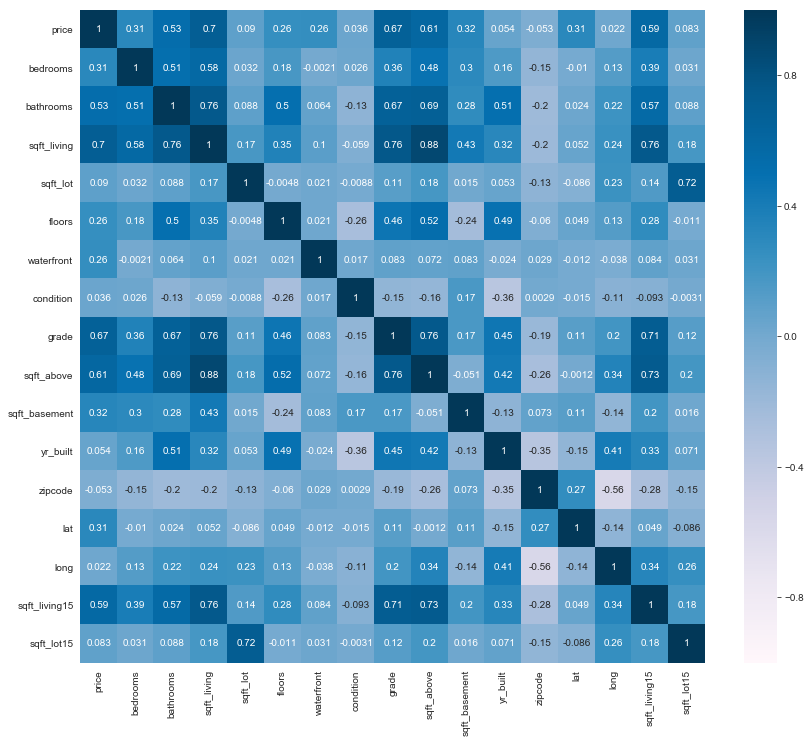

In [22]:
# heat map
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="PuBu")

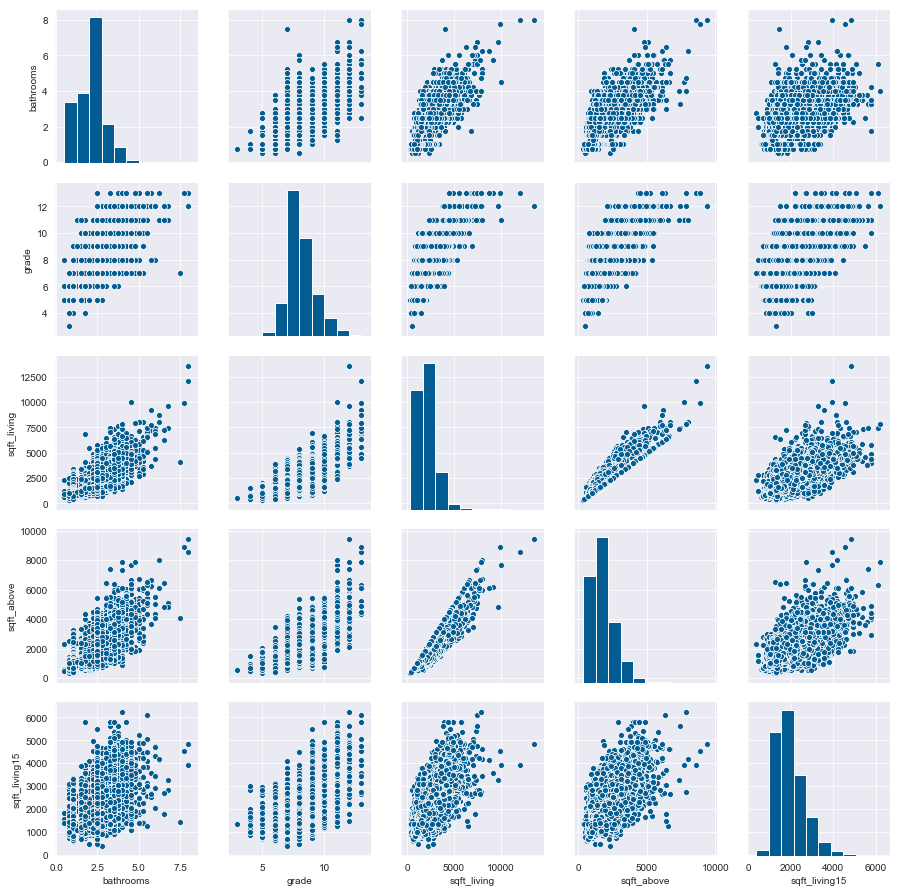

In [23]:
sns.pairplot(df, vars=['bathrooms', 'grade', 'sqft_living', 'sqft_above', 'sqft_living15']);

We can look at the most predictive features to decide which of the collinear features to drop.

In [24]:
# Look at which features are highly correlated with each other
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Store features to drop if their correlation coefficient is greater than 0.75
to_drop = [col for col in upper.columns if any(upper[col] > 0.75)]

print(to_drop)

['sqft_living', 'grade', 'sqft_above', 'sqft_living15']


In [25]:
# Rank the features by most predictive
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, mutual_info_regression

def feature_selector(X, y, scoring, k):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [26]:
target_flat = np.ravel(target.values)

In [27]:
# Rank the features and select the top ten most predictive
features_to_use = feature_selector(features, target_flat, mutual_info_regression, k=10)
features_to_use

,bedrooms,bathrooms,sqft_living,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,7,1180,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7,2170,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,6,770,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,7,1050,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8,1680,98074,47.6168,-122.045,1800,7503
5,4,4.50,5420,11,3890,98053,47.6561,-122.005,4760,101930
6,3,2.25,1715,7,1715,98003,47.3097,-122.327,2238,6819
7,3,1.50,1060,7,1060,98198,47.4095,-122.315,1650,9711
8,3,1.00,1780,7,1050,98146,47.5123,-122.337,1780,8113
9,3,2.50,1890,7,1890,98038,47.3684,-122.031,2390,7570


The heatmap above and scatterplots below show that sqft_living, grade, sqft_above, and sqft_living15 are highly correlated with one another. Our feature ranking indicates that sqft_living is the most predictive of these, so we will drop some others to eliminate collinearity problems. 

In [28]:
df.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)

Similarly, sqft_lot and sqft_lot15 are strongly collinear, so we should drop at least one. The weaker correlated feature is sqft_lot15.

In [29]:
df.drop(['sqft_lot15'], axis=1, inplace=True)

## 2. Converting and Transforming Variables 

We can look at joint plots to determine how best to treat our remaining features.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


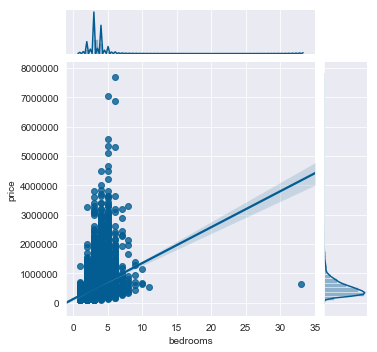

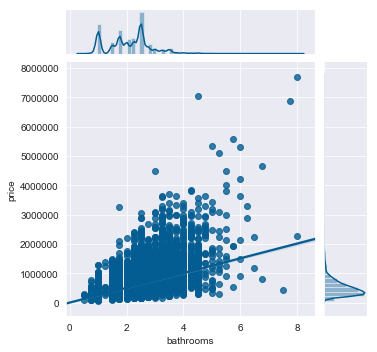

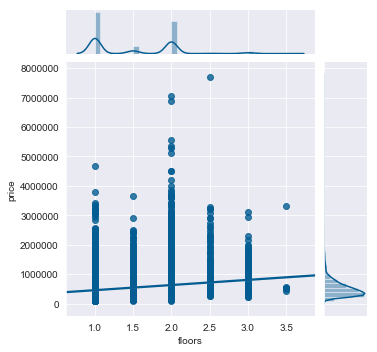

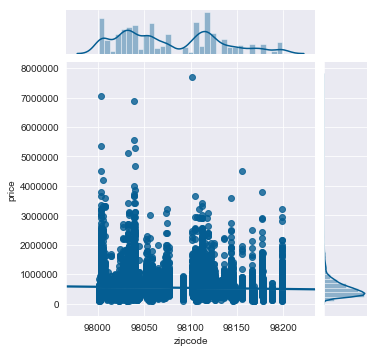

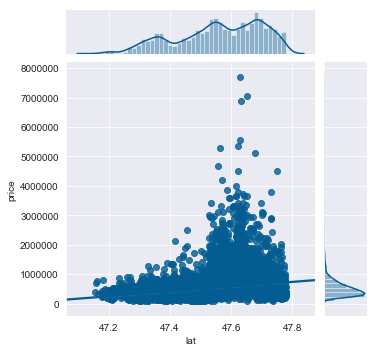

In [30]:
for col in ['bedrooms', 'bathrooms', 'floors', 'zipcode', 'lat']:
    
    sns.jointplot(x=df[col], y="price", data=df, kind = 'reg', height = 5)
    plt.show()

Bedrooms appears to have outliers.

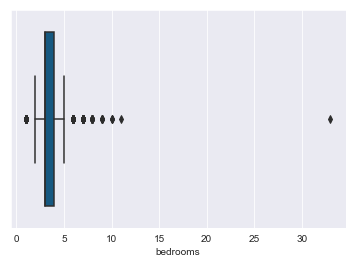

In [31]:
sns.boxplot(x=df['bedrooms'])

In [32]:
df[df['bedrooms'] > 15]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,zipcode,lat,long
15856,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,580.0,1947,98103,47.6878,-122.331


In [33]:
df.drop(df.index[15856], inplace=True)

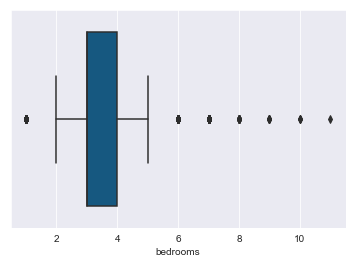

In [34]:
sns.boxplot(x=df['bedrooms'])

Let's look at our target variable and eliminate any extreme outliers.

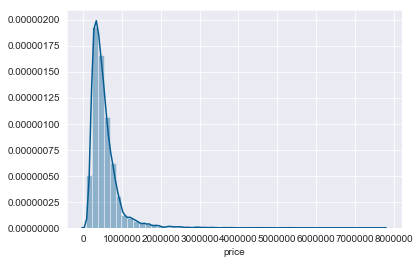

In [35]:
sns.distplot(df['price']);

In [36]:
df.reset_index()
df.drop(df[df.price > 3000000].index, inplace=True)

To use categorical variables in linear regression (e.g., floors), we need to create dummy variables or bins.

In [37]:
# Create dummy variables
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer

waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)

# Bin continuous values

disc_5k = KBinsDiscretizer(encode='onehot-dense', strategy='kmeans')
disc_5 = KBinsDiscretizer(encode='onehot-dense')
disc_3 = KBinsDiscretizer(encode='onehot-dense')

bedrooms_bin = disc_5k.fit_transform(df[['bedrooms']])
bathrooms_bin = disc_3.fit_transform(df[['bathrooms']])
floors_bin = disc_3.fit_transform(df[['floors']])
zipcode_bin = disc_5.fit_transform(df[['zipcode']]) 
lat_bin = disc_3.fit_transform(df[['lat']])

We'll drop the original columns and add the new ones. At this point, I have also dropped year built and longitude, as they were ranked low for predictive value.

In [38]:
df.drop(['waterfront', 'condition', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 
         'zipcode', 'long', 'lat'], axis=1, inplace=True)

In [39]:
# Add dummy variables
pd.concat([df, waterfront_dummies, condition_dummies], axis=1);

In [40]:
df.reset_index(drop=True, inplace=True)

In [41]:
# Add bins
df = pd.concat([df, pd.DataFrame(bedrooms_bin).add_prefix('bed'), pd.DataFrame(bathrooms_bin).add_prefix('bath'),
       pd.DataFrame(floors_bin).add_prefix('floors'), pd.DataFrame(zipcode_bin).add_prefix('zip'), 
               pd.DataFrame(lat_bin).add_prefix('lat')], axis=1)

In [42]:
# Drop redundant bins (k-1)
df.drop(['bed0', 'bath0', 'floors0', 'zip0', 'lat0'], axis=1, inplace=True)

## 3. Normalize and Scale Continuous Variables

Next, we will normalize and scale the continuous factors and log transform the target variable to normalize its distribution.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# First, split the data into training and testing
features = df.iloc[:,1:]
target = df.iloc[:,0]


#log transform price
target = np.log(target)

df_orig = df

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.3)

X_train_orig = X_train
X_test_orig = X_test
y_train_orig = y_train
y_test_orig = y_test

Next, we will scale the predictors. StandardScaler subtracts the mean and then scales to unit variance to bring the standard deviation equal to zero. RobustScaler is useful in this dataset because it reduces the effect of outliers by limiting the quantile range.

In [44]:
# create scalers

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler

scale_robust = RobustScaler(copy=False, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

scale_std = StandardScaler(copy=False)

# C. Linear Regression

## 1. Simple model: two most correlated variables

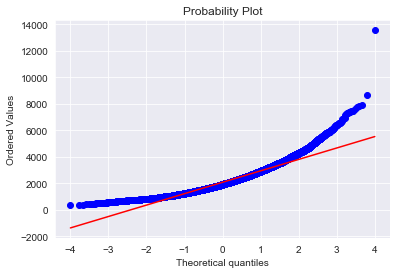

In [45]:
stats.probplot(df['sqft_living'], plot=plt);

In [46]:
import statsmodels.formula.api as smf
simple_est = smf.ols(formula='price~sqft_living+grade', data=df_orig).fit()
simple_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:14   Log-Likelihood:            -2.9617e+05
No. Observations:               21551   AIC:                         5.923e+05
Df Residuals:                   21548   BIC:                         5.924e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.809e+05    1.2e+04    -48.365      0.000   -6.04e+05   -5.57e+05
sqft_living   152.3935      2.627     58.004      0.000     147.244     157.543
grade        1.044e+05   2026.302     51.510      0.000       1e+05    1.08e+05
==============================================================================
Omnibus:                     9733.787   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87199.757
Skew:                           1.956   Prob(JB):                         0.00
Kurtosis:                      12.045   Cond. No.                     1.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

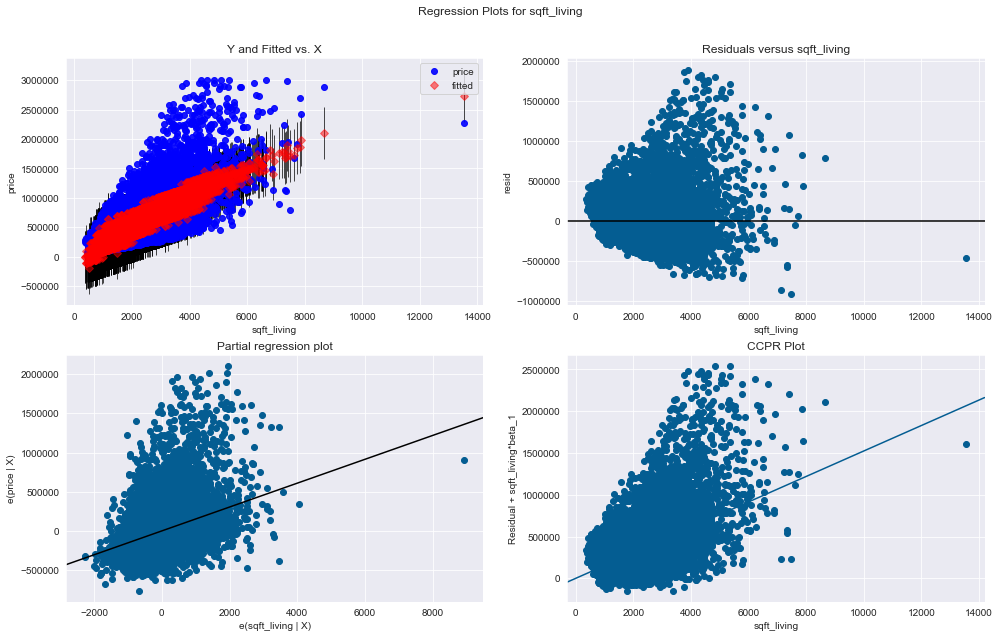

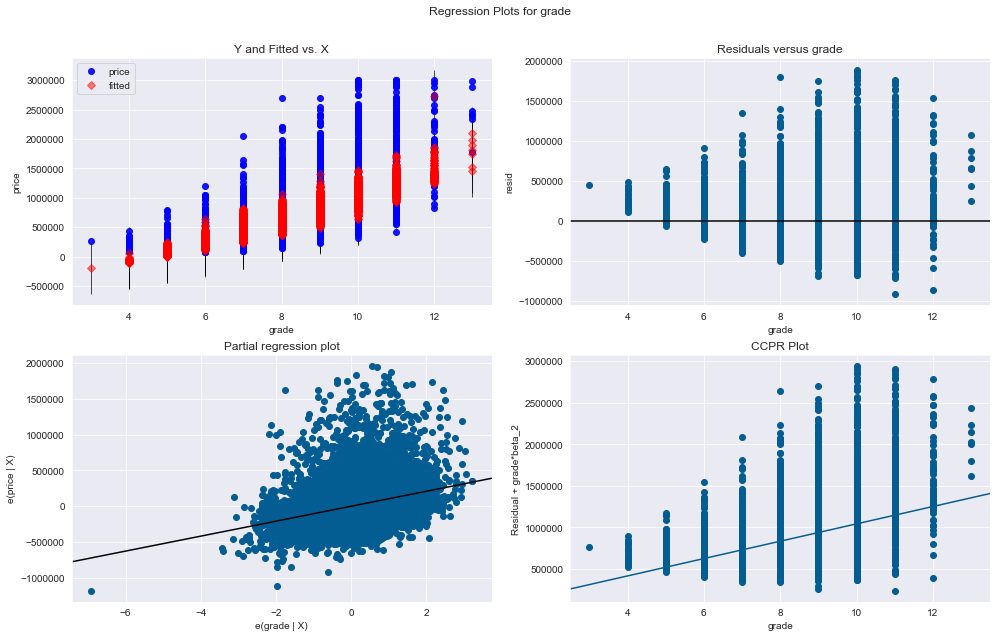

In [48]:
fig = plt.figure(figsize=(14, 9))
sm.graphics.plot_regress_exog(simple_est, 'sqft_living', fig=fig)
plt.show()

fig = plt.figure(figsize=(14, 9))
sm.graphics.plot_regress_exog(simple_est, 'grade', fig=fig)
plt.show()

## 2. Model with robust scaling:

In [49]:
X_train_rob = scale_robust.fit_transform(X_train)
X_test_rob = scale_robust.transform(X_test)

In [50]:
# With RobustScaler
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

#features = df.iloc[:,1:]
#target = df.iloc[:,:1]

features = X_train_rob
target = y_train

reg_model = reg.fit(X_train_rob, y_train)

X_int = sm.add_constant(features)

reg_model = sm.OLS(target,X_int).fit()

reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     2779.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:34   Log-Likelihood:                 159.29
No. Observations:               15085   AIC:                            -276.6
Df Residuals:                   15064   BIC:                            -116.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5038      0.008   1612.765      0.000      12.489      12.519
x1             0.2925      0.005     55.962      0.000       0.282       0.303
x2             0.0029      0.000     10.420      0.000       0.002       0.003
x3             0.1280      0.003     43.878      0.000       0.122       0.134
x4            -0.0178      0.003     -5.334      0.000      -0.024      -0.011
x5            -0.0078      0.005     -1.597      0.110      -0.017       0.002
x6            -0.0886      0.017     -5.158      0.000      -0.122      -0.055
x7            -0.1210      0.067     -1.808      0.071      -0.252       0.010
x8            -0.0830      0.139     -0.599      0.550      -0.355       0.189
x9             0.0350      0.007      5.283      0.000       0.022       0.048
x10            0.0527      0.007      7.253      0.000       0.038       0.067
x11         3.152e-16    9.5e-17      3.318      0.001    1.29e-16    5.01e-16
x12            0.0600      0.008      7.416      0.000       0.044       0.076
x13        -1.204e-16   2.06e-16     -0.585      0.559   -5.24e-16    2.83e-16
x14            0.0363      0.003     12.320      0.000       0.030       0.042
x15         3.775e-16   8.25e-17      4.575      0.000    2.16e-16    5.39e-16
x16           -0.0363      0.003    -12.320      0.000      -0.042      -0.030
x17            0.0383      0.006      6.018      0.000       0.026       0.051
x18           -0.0468      0.007     -6.800      0.000      -0.060      -0.033
x19            0.0818      0.007     11.411      0.000       0.068       0.096
x20            0.0013      0.007      0.194      0.846      -0.012       0.015
x21            0.2587      0.007     37.154      0.000       0.245       0.272
x22            0.5645      0.007     83.836      0.000       0.551       0.578
x23            0.7094      0.007     99.142      0.000       0.695       0.723
x24            0.4392      0.007     66.426      0.000       0.426       0.452
==============================================================================
Omnibus:                      869.215   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3446.224
Skew:                           0.132   Prob(JB):                         0.00
Kurtosis:                       5.327   Cond. No.                     4.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
from sklearn import metrics 
mymean = np.full((len(y_test), ), np.mean(y_train))
print("MSE: ",metrics.mean_squared_error(y_test, mymean))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, mymean)))
rmse = np.sqrt(metrics.mean_squared_error(y_test, mymean))

MSE:  0.26769581903460404
RMSE:  0.5173932924136184


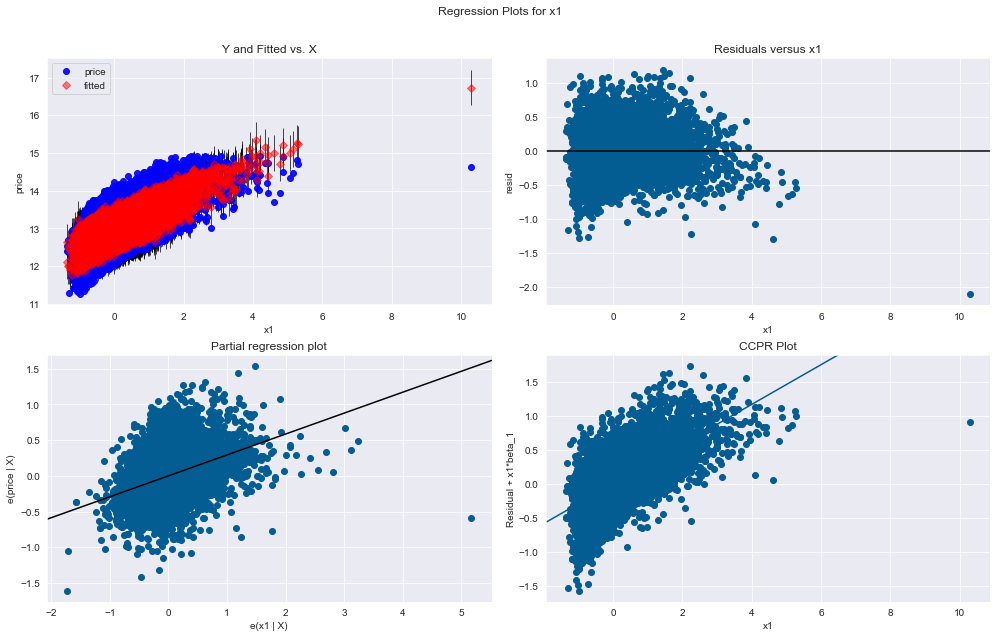

In [52]:
fig = plt.figure(figsize=(14, 9))
sm.graphics.plot_regress_exog(reg_model, 'x1', fig=fig)
plt.show()

Model with standard scaling:

In [53]:
# With StandardScaler
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.2)

X_train_std = scale_std.fit_transform(X_train)
X_test_std = scale_std.transform(X_test)

features = X_train_std
target = y_train

reg_model = reg.fit(X_train_std, y_train)
X_int = sm.add_constant(features)

reg_model = sm.OLS(target,X_int).fit()

reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     2231.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:50   Log-Likelihood:                 130.69
No. Observations:               12068   AIC:                            -219.4
Df Residuals:                   12047   BIC:                            -64.02
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0413      0.002   5979.991      0.000      13.037      13.046
x1             0.2323      0.005     49.854      0.000       0.223       0.241
x2             0.0207      0.002      9.099      0.000       0.016       0.025
x3             0.1511      0.004     39.589      0.000       0.144       0.159
x4            -0.0128      0.003     -4.245      0.000      -0.019      -0.007
x5            -0.0051      0.003     -1.924      0.054      -0.010    9.68e-05
x6            -0.0114      0.002     -4.937      0.000      -0.016      -0.007
x7            -0.0029      0.002     -1.307      0.191      -0.007       0.001
x8            -0.0013      0.002     -0.592      0.554      -0.006       0.003
x9             0.0130      0.003      4.352      0.000       0.007       0.019
x10            0.0195      0.003      6.238      0.000       0.013       0.026
x11        -1.618e-17   2.31e-18     -7.015      0.000   -2.07e-17   -1.17e-17
x12            0.0274      0.004      6.111      0.000       0.019       0.036
x13         8.397e-17   1.67e-18     50.269      0.000    8.07e-17    8.72e-17
x14            0.0176      0.002     10.722      0.000       0.014       0.021
x15         6.827e-18   1.15e-18      5.941      0.000    4.57e-18    9.08e-18
x16           -0.0176      0.002    -10.722      0.000      -0.021      -0.014
x17            0.0155      0.003      5.376      0.000       0.010       0.021
x18           -0.0141      0.003     -4.675      0.000      -0.020      -0.008
x19            0.0337      0.003     10.388      0.000       0.027       0.040
x20           -0.0009      0.003     -0.284      0.776      -0.007       0.005
x21            0.1006      0.003     32.450      0.000       0.095       0.107
x22            0.2242      0.003     74.542      0.000       0.218       0.230
x23            0.2847      0.003     88.593      0.000       0.278       0.291
x24            0.1755      0.003     59.093      0.000       0.170       0.181
==============================================================================
Omnibus:                      695.691   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2872.347
Skew:                           0.094   Prob(JB):                         0.00
Kurtosis:                       5.383   Cond. No.                     1.56e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
mymean = np.full((len(y_test), ), np.mean(y_train))
print("MSE: ",metrics.mean_squared_error(y_test, mymean))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, mymean)))
rmse = np.sqrt(metrics.mean_squared_error(y_test, mymean))

MSE:  0.2660806452187228
RMSE:  0.5158300545903881


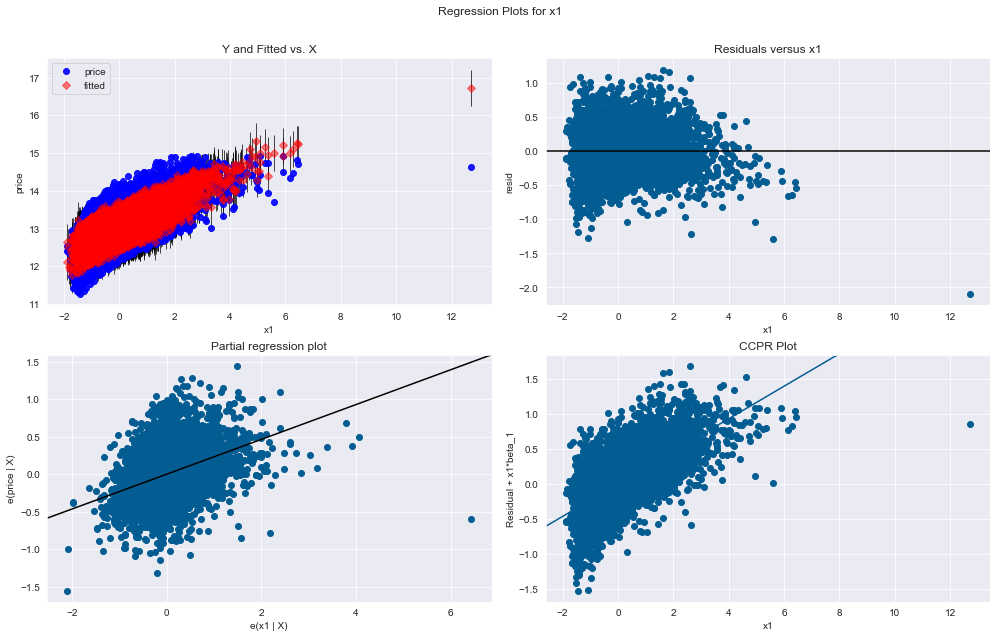

In [55]:
fig = plt.figure(figsize=(14, 9))
sm.graphics.plot_regress_exog(reg_model, 'x1', fig=fig)
plt.show()

# D. Takeaways

+ My models were able to predict the price of a house with an adjusted R-squared of 0.79 and a MSE of 0.27. 
+ In this dataset, sqft_living and grade are the variables most highly correlated with price.
+ R-squared and MSE/RMSE can diverge sharply, and multiple metrics of accuracy must be taken into account.
+ Normalizing the target variable with log transformation can have dramatic effects on the model's accuracy.
+ The choice of which variables to keep and which to eliminate for multicollinearity has significant impacts on the accuracy of the final model.
+ Data exploration and cleaning take up more time than running the actual regressions, but are crucial precursors to manipulating and processing the information.
+ Pandas and scikitlearn contain many powerful tools with extensive documentation to aid in statistical analysis of data, but these libraries present a surprising number of incompatibilities that must be resolved via ad-hoc methods (or discovery of additional libraries like sklearn-pandas).
